# Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C:\Users\MUFFID\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Dataset

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_dataset = pd.read_csv('titanic_test.csv')
test_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Train Data & Test Data

In [4]:
train_data = dataset[['Sex', 'Age', 'Pclass', 'Fare']]
train_data.head()

,Sex,Age,Pclass,Fare
0,male,22.0,3,7.2500
1,female,38.0,1,71.2833
2,female,26.0,3,7.9250
3,female,35.0,1,53.1000
4,male,35.0,3,8.0500


In [5]:
test_data = test_dataset[['Sex', 'Age', 'Pclass', 'Fare']]
test_data.head()

,Sex,Age,Pclass,Fare
0,male,34.5,3,7.8292
1,female,47.0,3,7.0000
2,male,62.0,2,9.6875
3,male,27.0,3,8.6625
4,female,22.0,3,12.2875


# Preprocessing
## Handling Missing Values

In [6]:
train_data.isnull().sum()

Sex         0
Age       177
Pclass      0
Fare        0
dtype: int64

In [7]:
avg_age_per_class = dataset.groupby('Survived')['Age'].mean()

for survived, mean_age in avg_age_per_class.items():
    train_data.loc[(dataset['Survived'] == survived) & (train_data['Age'].isnull()), 'Age'] = mean_age

train_data['Age'].tail()

886    27.000000
887    19.000000
888    30.626179
889    26.000000
890    32.000000
Name: Age, dtype: float64

In [8]:
train_data.isnull().sum()

Sex       0
Age       0
Pclass    0
Fare      0
dtype: int64

In [9]:
test_data.isnull().sum()

Sex        0
Age       86
Pclass     0
Fare       1
dtype: int64

In [10]:
# Missing Values Position
Age_pos_missing_test = np.where(pd.isnull(test_data['Age']))
Fare_pos_missing_test = np.where(pd.isnull(test_data['Fare'])) 

# Dropping Missing Values
test_data = test_data.dropna()
test_data.isnull().sum()

Sex       0
Age       0
Pclass    0
Fare      0
dtype: int64

## Encoding Categorical Features

In [11]:
label_encoder = LabelEncoder()
train_data.loc[:, 'Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data.head()

,Sex,Age,Pclass,Fare
0,1,22.0,3,7.2500
1,0,38.0,1,71.2833
2,0,26.0,3,7.9250
3,0,35.0,1,53.1000
4,1,35.0,3,8.0500


In [12]:
test_data.loc[:, 'Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data.head()

,Sex,Age,Pclass,Fare
0,1,34.5,3,7.8292
1,0,47.0,3,7.0000
2,1,62.0,2,9.6875
3,1,27.0,3,8.6625
4,0,22.0,3,12.2875


# Train Label & Test label

In [13]:
train_label = dataset.loc[:, ['Survived']]
train_label.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [14]:
titanic_testlabel = pd.read_csv('titanic_testlabel.csv')
test_label = []

for index in Age_pos_missing_test[0]:
    if index in titanic_testlabel.index:
        titanic_testlabel.drop(index, inplace = True)
        
for index in Fare_pos_missing_test[0]:
    if index in titanic_testlabel.index:
        titanic_testlabel.drop(index, inplace = True)

for index, row in titanic_testlabel.iterrows():
    test_label.append(row['Survived'])

test_label = pd.DataFrame(test_label, columns = ['Survived'] )
test_label.head()

,Survived
0,0
1,1
2,0
3,0
4,1


# Classification

In [15]:
dtc = DecisionTreeClassifier()

dtc.fit(train_data, train_label)
class_results = dtc.predict(test_data)

error_ratio = 1 - accuracy_score(test_label, class_results)
print(f'Error ratio: {error_ratio * 100:.2f} %')

Error ratio: 23.26 %


# Visualization

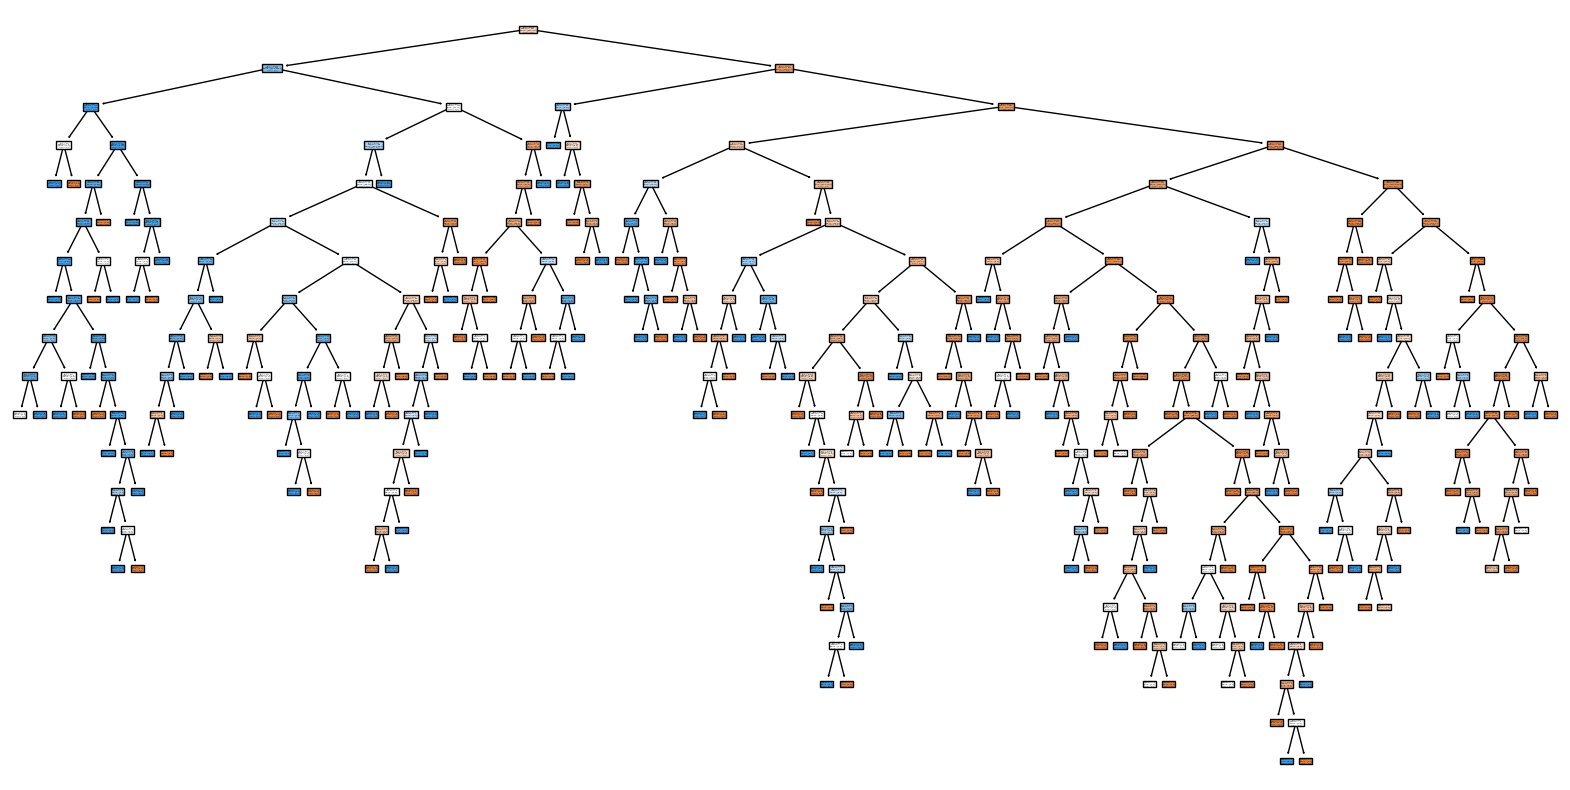

In [16]:
plt.figure(figsize = (20, 10))
plot_tree(dtc, filled = True, feature_names = train_data.columns, class_names = True)
plt.show()